# Importing Necessary Items

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


import pickle
with open("currency_prediction_model_3.pkl", "rb") as f:
    currency_model = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-05-25 20:37:06         3514
metadata.json                                  2023-05-25 20:37:06           64
variables.h5                                   2023-05-25 20:37:06    524236392
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15


# Assigning the values w.r.t to classes

In [2]:
cur_dict = {0:10,1:20,2:50,3:100,4:200,5:500,6:2000}

# Get predicted amount from image

In [3]:
def amount_from_img(path):
    og = cv2.imread(path)
    p1 = cv2.resize(og,(300,300))
    p1 = p1/255
    p1 = np.array([p1])
    prediction = currency_model.predict(p1)
    digit = np.argmax(prediction)
    amount = cur_dict[digit]
    plt.imshow(og)
    plt.title(f"{amount} Rupees")

# Samples

1/1 [==============================] - 0s 129ms/step


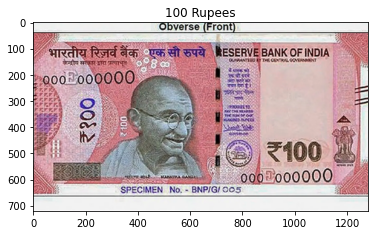

In [4]:
amount_from_img("C:/Users/Admin/Downloads/100.png")

1/1 [==============================] - 0s 39ms/step


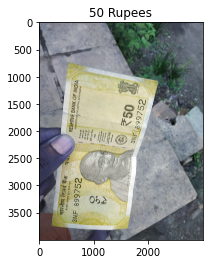

In [5]:
amount_from_img(r"D:\IT-VEDANT\CV\Currency_Classification_Project\dataset\test\50__366.jpg")

1/1 [==============================] - 0s 49ms/step


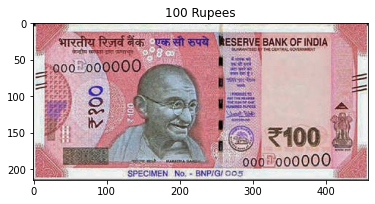

In [6]:
amount_from_img(r"D:\IT-VEDANT\CV\Currency_Classification_Project\dataset\test\100_4.jpg")

1/1 [==============================] - 0s 53ms/step


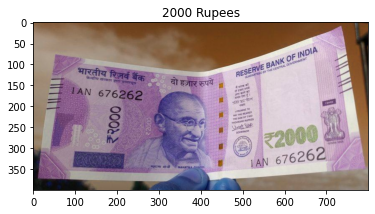

In [7]:
amount_from_img(r"C:\Users\Admin\Downloads\2000.jfif")

# Get predicted amount from video

In [8]:

cap = cv2.VideoCapture(0)
while(cap.isOpened()):

    ret, og_frame = cap.read()
    
    # changing size of an image same as required for an input image
    frame = cv2.resize(og_frame, (300,300))   

    # Scalling
    frame = frame/255     

    # Convert the image to a NumPy array.
    image = np.array([frame])

    
    prediction = currency_model.predict([image])
    
    digit = np.argmax(prediction)
    digit = cur_dict[digit]
    cv2.putText(og_frame, str(digit), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    
    cv2.imshow('frame',og_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 46ms/step


# Error

1/1 [==============================] - 0s 44ms/step


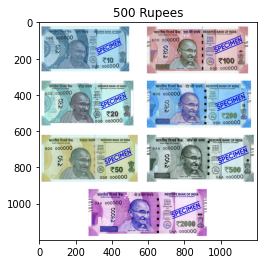

In [9]:
amount_from_img(r"C:\Users\Admin\Downloads\Banknote_of_india.png")